## Decision Tree
Contrary to logistic regression, a decision tree does not make any assumptions about the specific form of the relationship between the input and the output variables. The algorithm essentially divides the explanatory characteristics into pertinent and irrelevant groups. While doing this, it aims to minimize the misclassification cost, making it naturally adept at modeling non-linear and intricate relationships, as well as interactions between different variables.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
# Read data
new_dataset_efmjieh1 = pd.read_csv("imputedfi.csv")
# Specify the variables to scale
numerical_variables = ["efalimo", "efalip", "efcapgn", "efccar", "efchtxb", 
"efcpqpp", "efearng", "efgi", "efgstxc", "efgtr", "efinva", "efoasgi", "efogovtr", "efothinc", "efpen", "efpenrec", "efphpr", "efpvtxc", "efrppc", "efrspwi", "efsapis", "efsemp", 
"efsize", "efuiben", "efwkrcp", "efagofmp", "efagyfmp", "hlev2g"]

# Specify categorical variables
categorical_variables = ["eftyp", "prov", "dwltyp", "dwtenr", "marstp", "efmjsi","sex","immst","uszgap"]
new_dataset_efmjieh1.loc[new_dataset_efmjieh1['fschhldm'] >= 1, 'fschhldm'] = 1

In [2]:
# Convert target variable to categorical
new_dataset_efmjieh1['fschhldm'] = new_dataset_efmjieh1['fschhldm'].astype('category')

# Create the target and features
y = new_dataset_efmjieh1['fschhldm']
X = new_dataset_efmjieh1.drop(columns=['fschhldm'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Use ColumnTransformer to apply the transformations to the correct columns in the dataframe.
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_variables),
                                               ('cat', categorical_transformer, categorical_variables)])

# Define SMOTENC for balancing the data
smote_nc = SMOTENC(categorical_features=[X_train.columns.get_loc(c) for c in categorical_variables], random_state=42, sampling_strategy='minority')

# Instantiate the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Define the pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('smote_nc', smote_nc),
                        ('classifier', classifier)])


In [3]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['efalimo', 'efalip',
                                                   'efcapgn', 'efccar',
                                                   'efchtxb', 'efcpqpp',
                                                   'efearng', 'efgi', 'efgstxc',
                                                   'efgtr', 'efinva', 'efoasgi',
                                                   'efogovtr', 'efothinc',
                                                   'efpen', 'efpenrec',
                                                   'efphpr', 'efpvtxc',
                                                   'efrppc', 'efrspwi',
                                                   'efsapis', 'efsemp',
                                                   'efsize', 'efuiben',
                                                   'efwkrcp', 'efagofmp',
                                                   'efagyfmp', 'hlev2g']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['eftyp', 'prov', 'dwltyp',
                                                   'dwtenr', 'marstp', 'efmjsi',
                                                   'sex', 'immst',
                                                   'uszgap'])])),
                ('smote_nc',
                 SMOTENC(categorical_features=[32, 28, 29, 30, 31, 13, 34, 35,
                                               36],
                         random_state=42, sampling_strategy='minority')),
                ('classifier', DecisionTreeClassifier(random_state=42))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26545
           1       1.00      1.00      1.00      5282

    accuracy                           1.00     31827
   macro avg       1.00      1.00      1.00     31827
weighted avg       1.00      1.00      1.00     31827

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8849
           1       0.31      0.37      0.34      1761

    accuracy                           0.76     10610
   macro avg       0.59      0.60      0.60     10610
weighted avg       0.78      0.76      0.77     10610



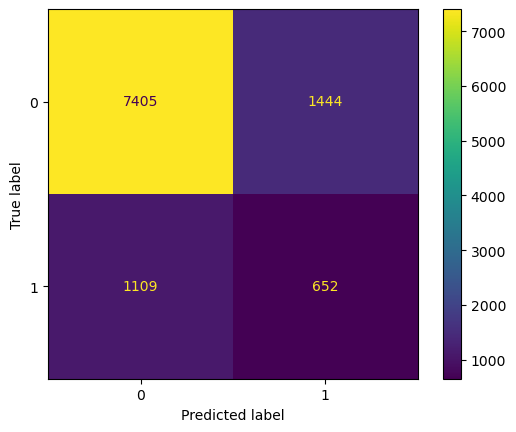

In [4]:
# Make predictions
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

# Print classification reports
print(classification_report(y_train, y_hat_train))
print(classification_report(y_test, y_hat_test))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
plt.show()

In [5]:
# Compute training and test accuracy
train_acc = accuracy_score(y_train, y_hat_train)
test_acc = accuracy_score(y_test, y_hat_test)

print("Training Accuracy: {:.2f}%".format(train_acc * 100))
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
# Compute probabilities
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC AUC
roc_auc_train = roc_auc_score(y_train, y_train_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print("Training ROC AUC: {:.2f}".format(roc_auc_train))
print("Test ROC AUC: {:.2f}".format(roc_auc_test))


Training Accuracy: 100.00%
Test Accuracy: 75.94%
Training ROC AUC: 1.00
Test ROC AUC: 0.60


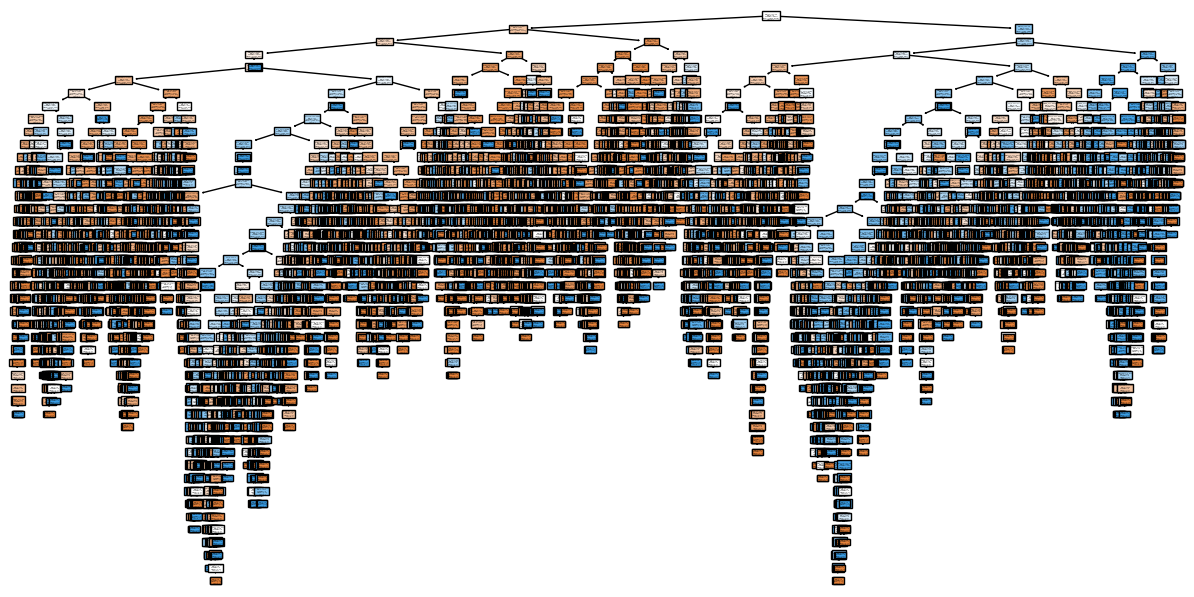

In [10]:
# Get the classifier from the pipeline
clf = model.named_steps['classifier']

# Get the preprocessor from the pipeline
preprocessor = model.named_steps['preprocessor']

# Get the one-hot encoder from the preprocessor
ohe = preprocessor.named_transformers_['cat']

# Get the feature names after one-hot encoding
ohe_feature_names = list(ohe.get_feature_names_out(input_features=categorical_variables))

# Combine with numerical feature names
feature_names = numerical_variables + ohe_feature_names

# Get class names
class_names = y.unique().astype(str)

plt.figure(figsize=(15, 7.5))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()
